# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy import stats

# Loading the dataset

In [2]:
train = pd.read_csv('../data/house_train.csv')
test = pd.read_csv('../data/house_test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
# Separating the categorical and continuous columns from the training dataset

cat = []
con = []

for i in train.columns:
    if (train[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

In [8]:
con.remove('Id')

In [9]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Handling missing values

In [10]:
miss1 = (train.isna().sum()/train.shape[0])*100
miss1 = pd.DataFrame(miss1, columns=['count'])
miss1 = miss1.sort_values(by='count', ascending=False)
miss1

,count
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
...,...
ExterQual,0.000000
Exterior2nd,0.000000
Exterior1st,0.000000
RoofMatl,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


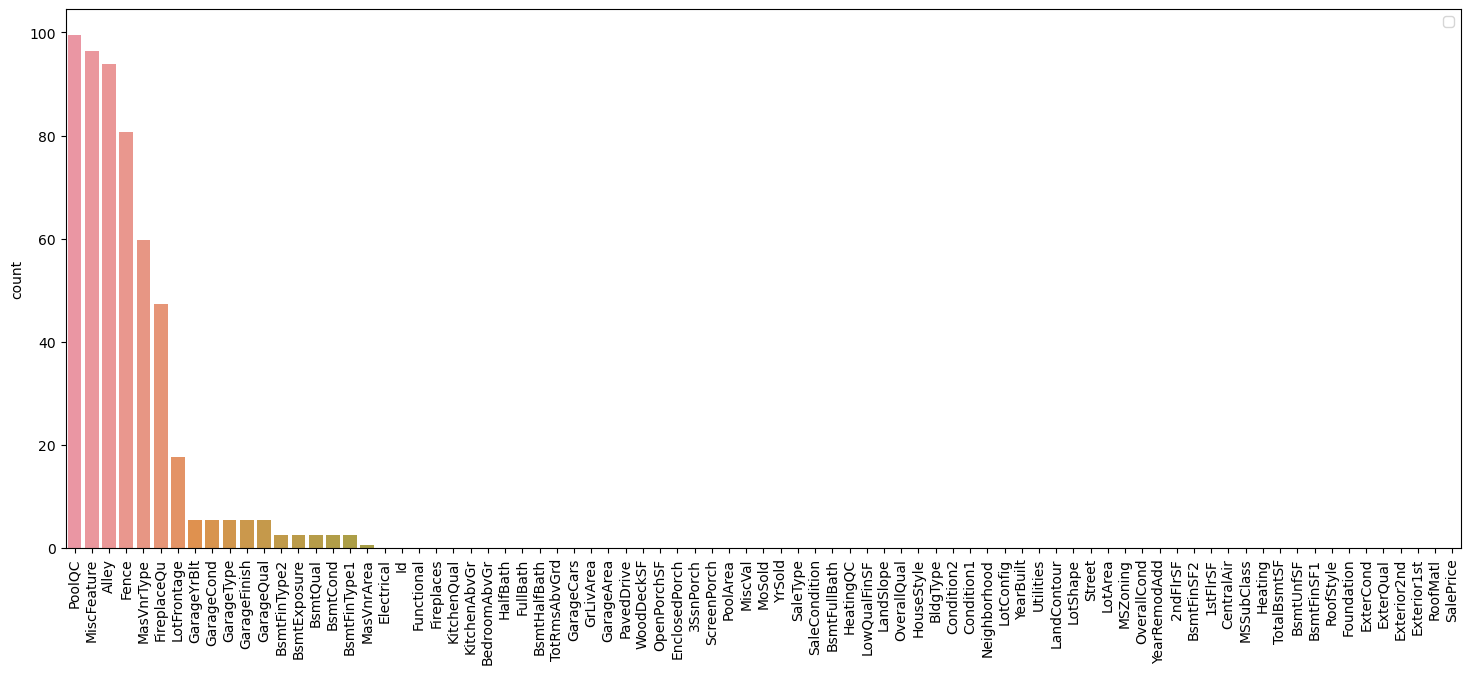

In [11]:
plt.figure(figsize=(18, 7))
sns.barplot(data=miss1, x=miss1.index, y='count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [12]:
miss1[:6]

,count
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274


In [13]:
miss2 = (test.isna().sum()/test.shape[0])*100
miss2 = pd.DataFrame(miss2, columns=['count'])
miss2 = miss2.sort_values(by='count', ascending=False)
miss2

,count
PoolQC,99.794380
MiscFeature,96.504455
Alley,92.666210
Fence,80.123372
MasVnrType,61.274846
...,...
Electrical,0.000000
1stFlrSF,0.000000
2ndFlrSF,0.000000
LowQualFinSF,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


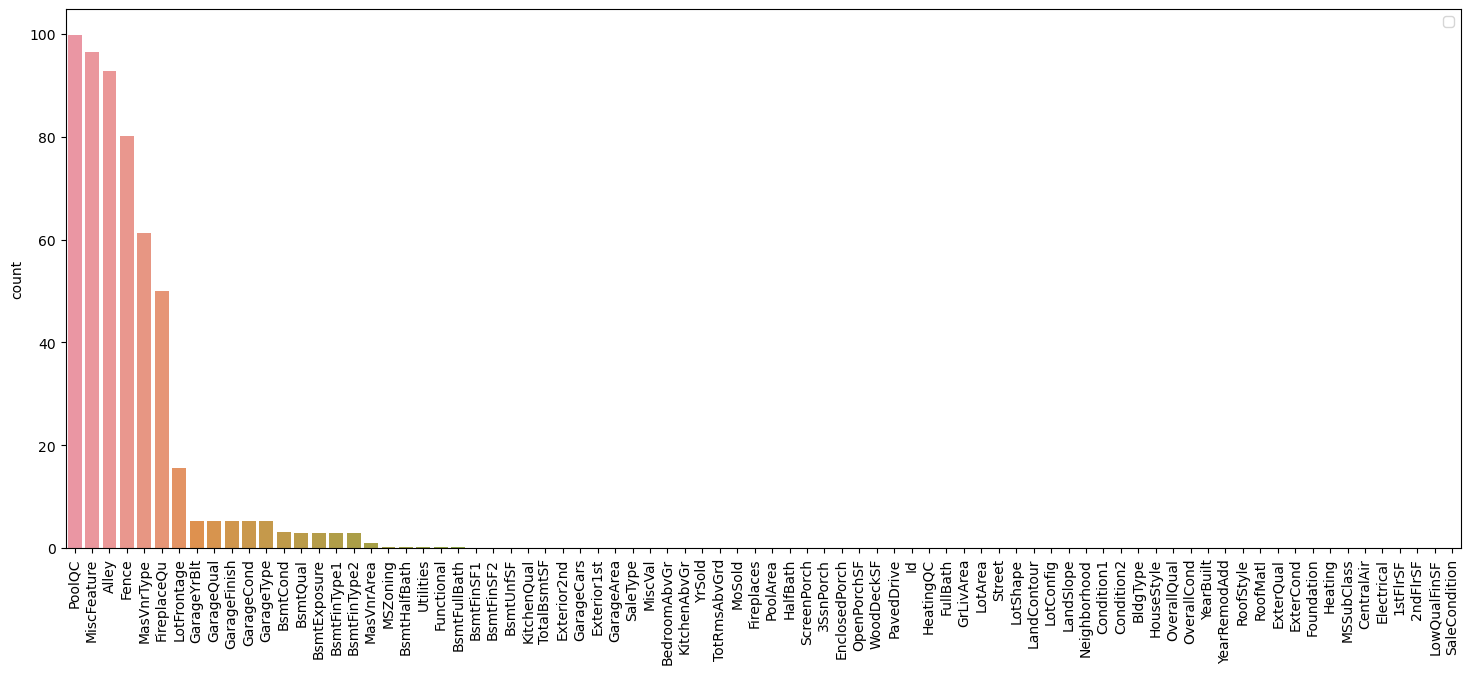

In [14]:
plt.figure(figsize=(18, 7))
sns.barplot(data=miss2, x=miss2.index, y='count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [15]:
val = miss2[:6].index

In [16]:
val = val.values
val

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType',
       'FireplaceQu'], dtype=object)

In [17]:
# Filling the top 5 missing columns with '0' in both training and testing dataset

for i in val:
    train[i].fillna("0", inplace=True)
    test[i].fillna("0", inplace=True)

In [18]:
miss1 = (train.isna().sum()/train.shape[0])*100
miss1 = pd.DataFrame(miss1, columns=['count'])
miss1 = miss1.sort_values(by='count', ascending=False)
miss1

,count
LotFrontage,17.739726
GarageFinish,5.547945
GarageType,5.547945
GarageQual,5.547945
GarageCond,5.547945
...,...
MasVnrType,0.000000
Exterior2nd,0.000000
Exterior1st,0.000000
RoofMatl,0.000000


In [19]:
miss2 = (test.isna().sum()/test.shape[0])*100
miss2 = pd.DataFrame(miss2, columns=['count'])
miss2 = miss2.sort_values(by='count', ascending=False)
miss2

,count
LotFrontage,15.558602
GarageFinish,5.346127
GarageQual,5.346127
GarageCond,5.346127
GarageYrBlt,5.346127
...,...
CentralAir,0.000000
Electrical,0.000000
1stFlrSF,0.000000
2ndFlrSF,0.000000


In [20]:
# Removing the rest of the missing columns from both training and testing dataset

from sklearn.impute import SimpleImputer
si1 = SimpleImputer(strategy='mean')
si2 = SimpleImputer(strategy='most_frequent')

A = pd.DataFrame(si1.fit_transform(train[con]), columns=con)
B = pd.DataFrame(si2.fit_transform(train[cat]), columns=cat)

train_new = A.join(B)
con.remove('SalePrice')

A = pd.DataFrame(si1.fit_transform(test[con]), columns=con)
B = pd.DataFrame(si2.fit_transform(test[cat]), columns=cat)

test_new = A.join(B)
con.append('SalePrice')

In [21]:
train_new.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [22]:
test_new.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
                ..
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

# Checking the co-relation of continuous columns

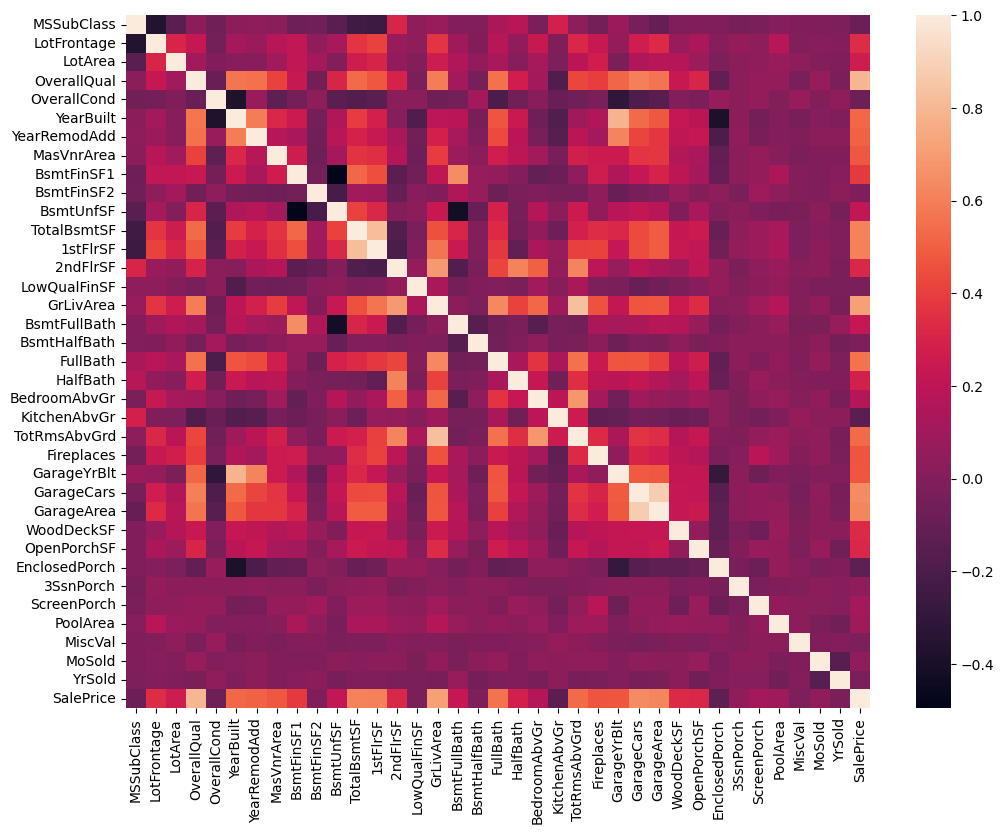

In [23]:
corr = train_new[con].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr)
plt.show()

In [24]:
corr1 = (corr['SalePrice'].sort_values(ascending=False)*100)

In [25]:
corr1 = corr1[1:]

In [26]:
corr2 = pd.DataFrame(corr1)
corr2

,SalePrice
OverallQual,79.098160
GrLivArea,70.862448
GarageCars,64.040920
GarageArea,62.343144
TotalBsmtSF,61.358055
1stFlrSF,60.585218
FullBath,56.066376
TotRmsAbvGrd,53.372316
YearBuilt,52.289733
YearRemodAdd,50.710097


In [27]:
corr2['SalePrice'] = np.abs(corr2.SalePrice)
corr2 = corr2.sort_values(by='SalePrice', ascending=False)

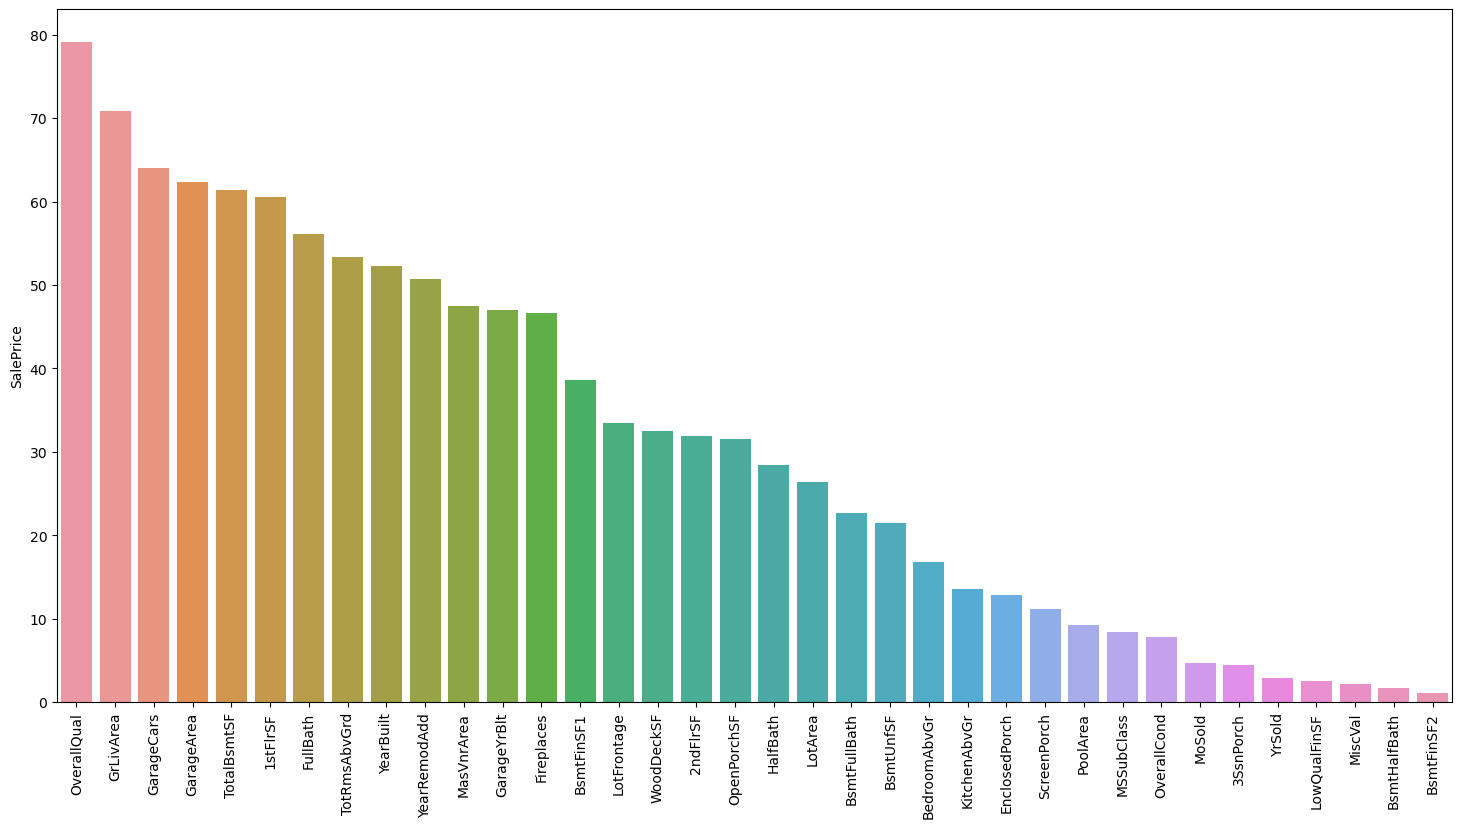

In [28]:
plt.figure(figsize=(18, 9))
sns.barplot(data=corr2, x=corr2.index, y='SalePrice')
plt.xticks(rotation=90)
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


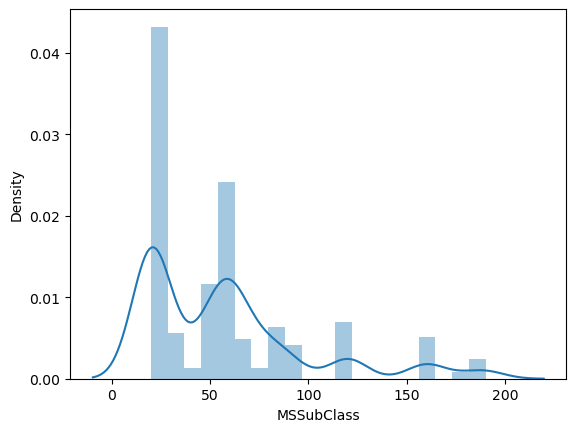

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


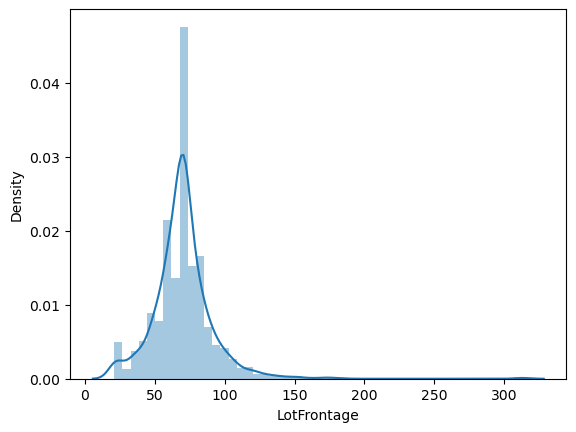

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


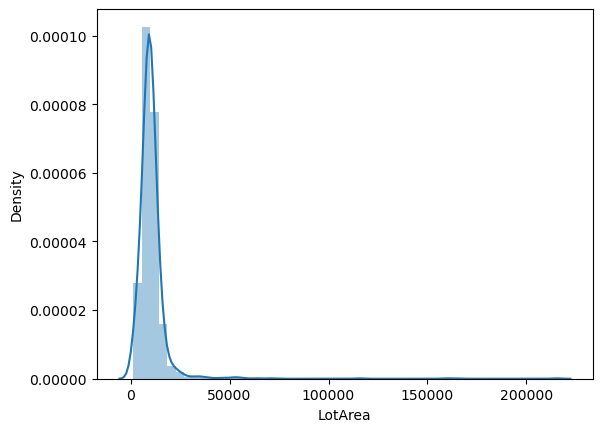

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


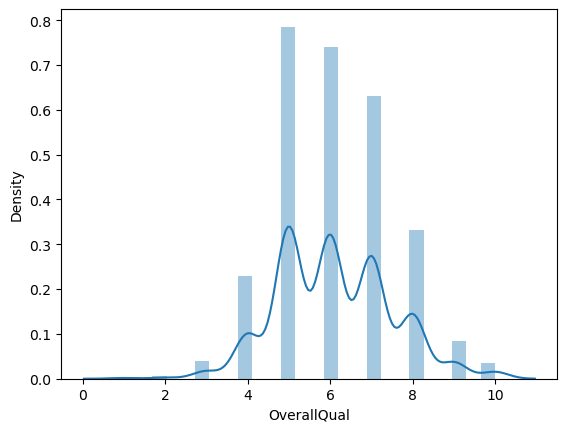

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


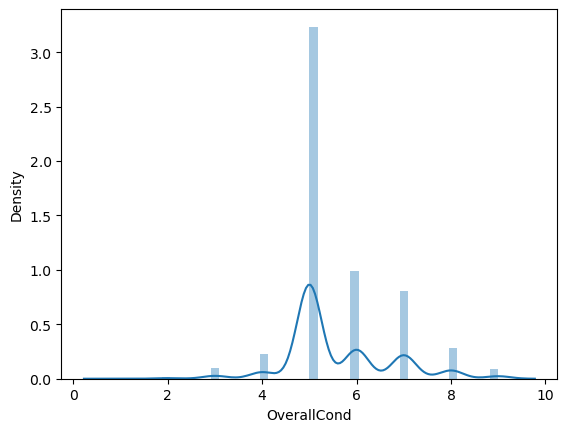

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


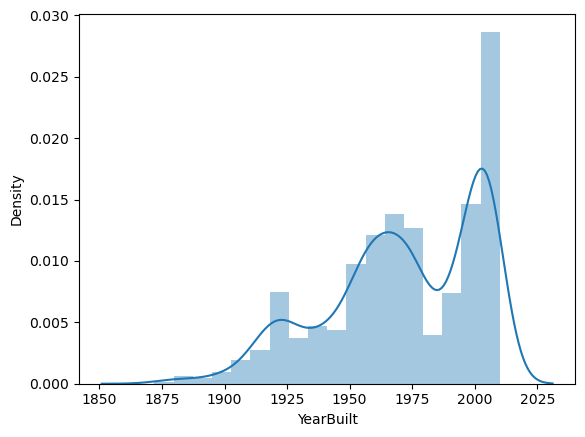

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


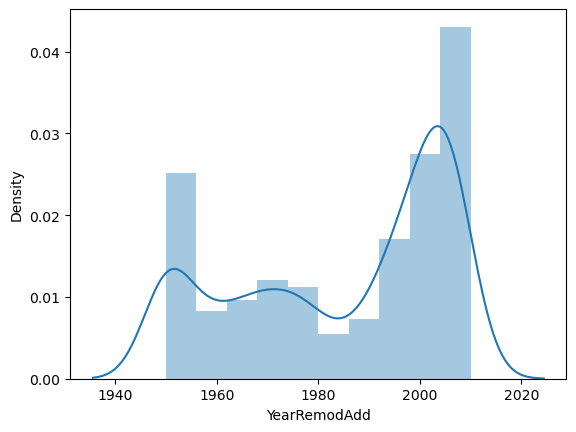

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


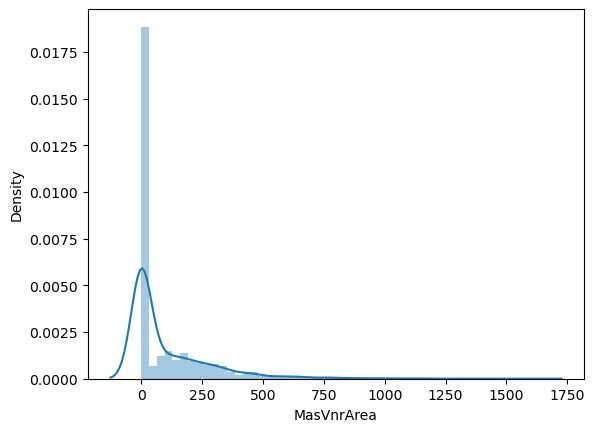

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


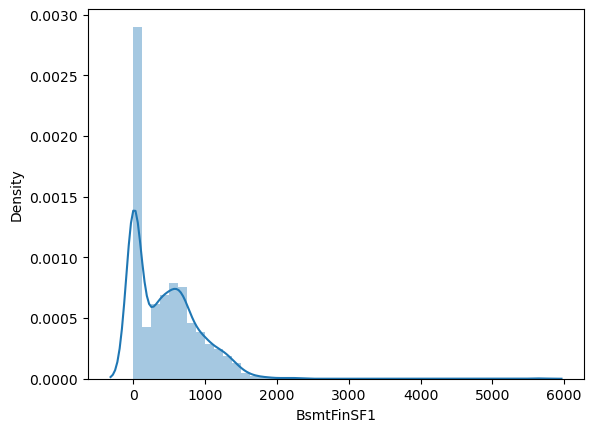

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


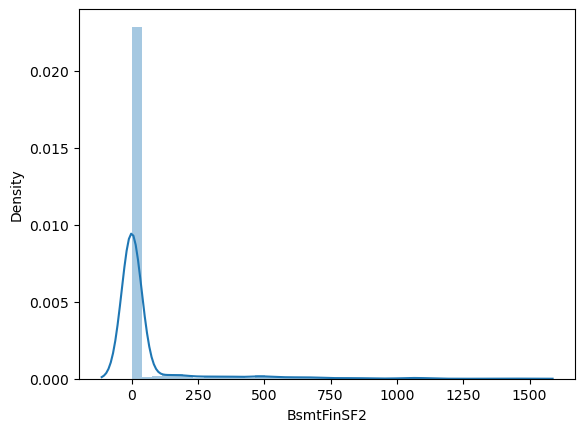

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


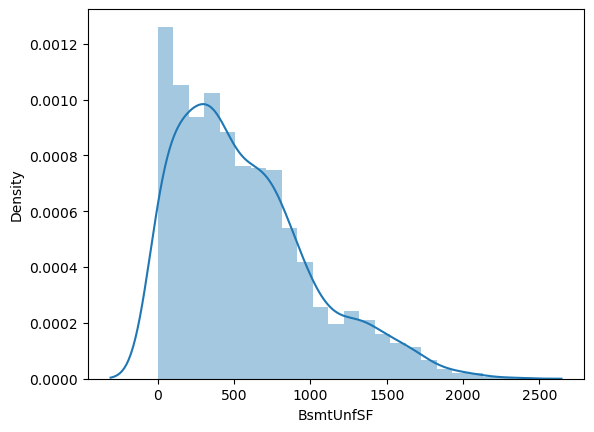

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


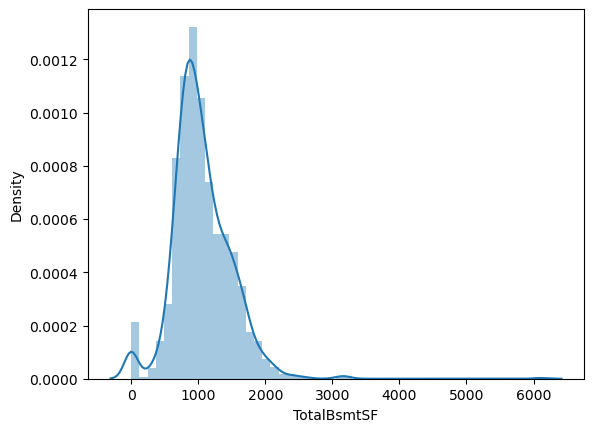

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


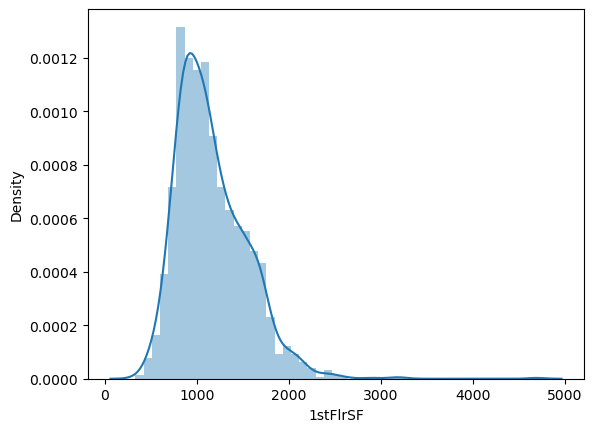

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


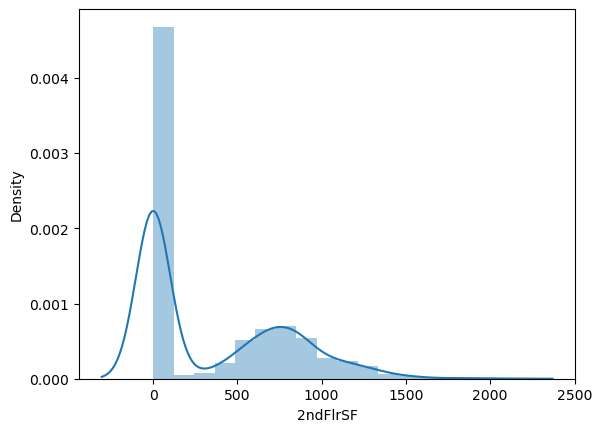

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


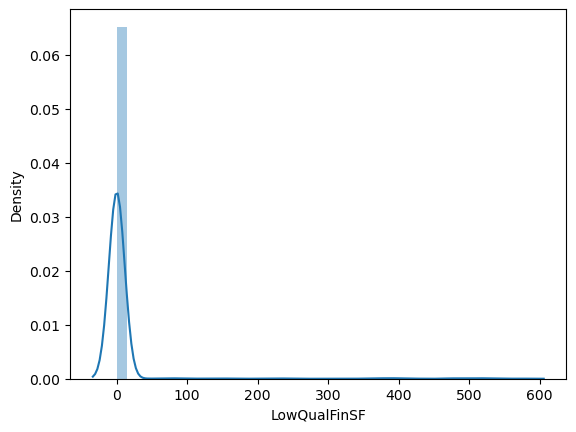

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


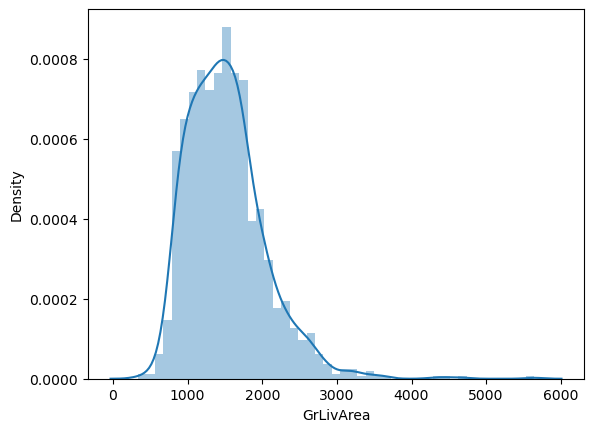

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


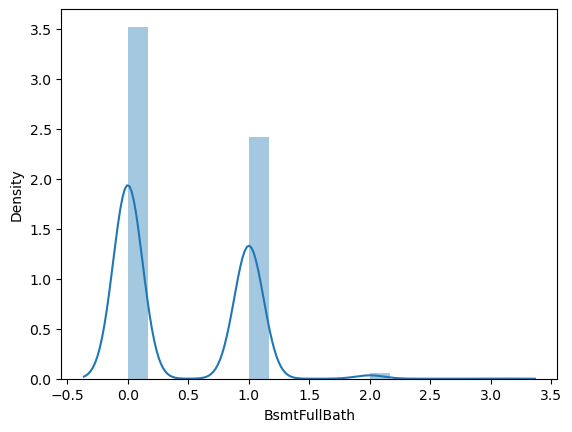

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


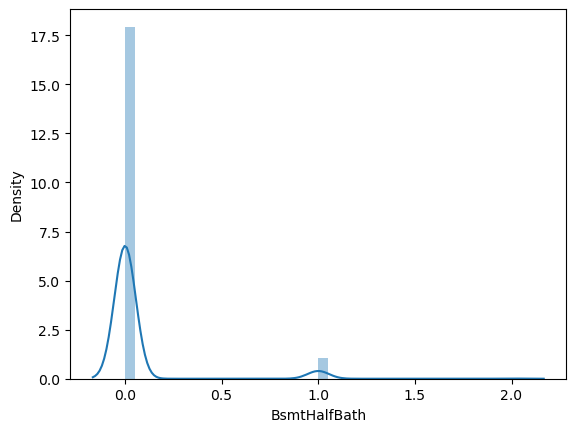

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


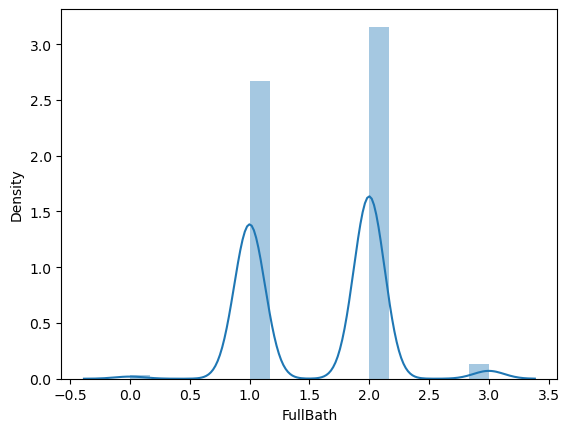

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


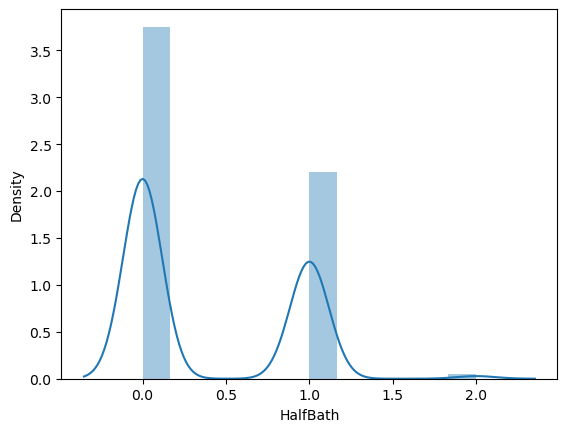

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


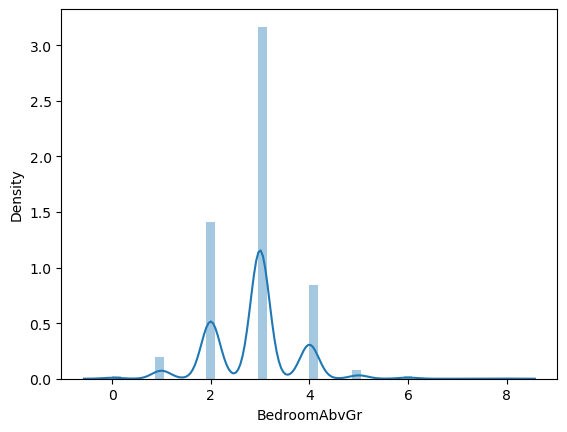

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


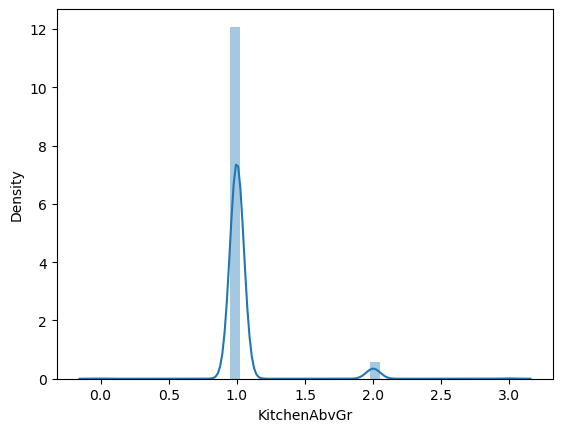

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


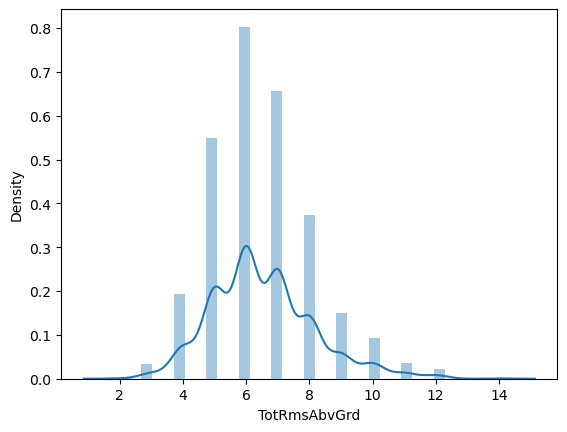

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


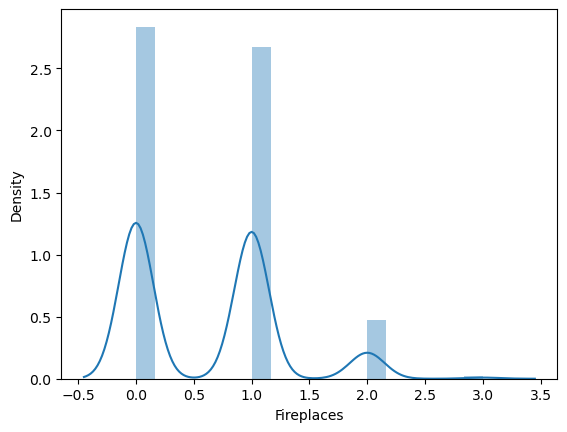

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


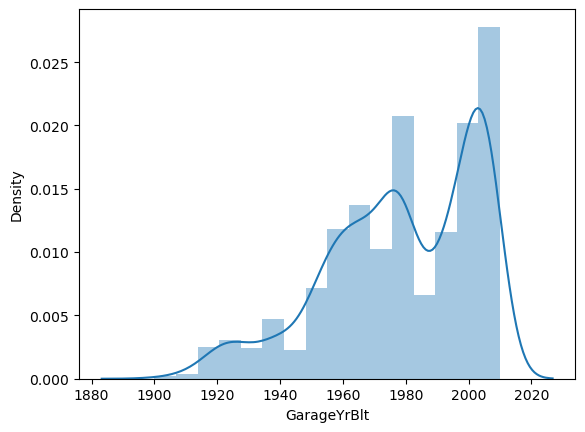

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


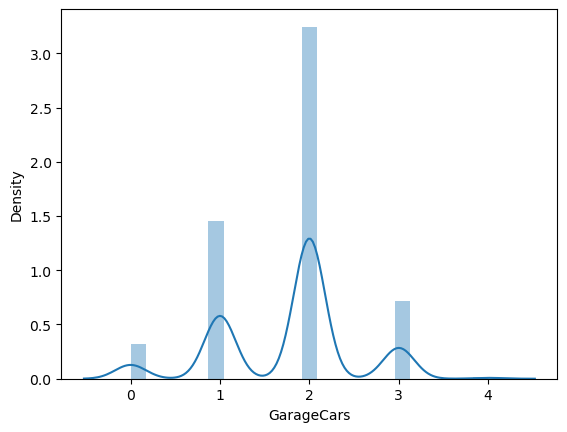

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


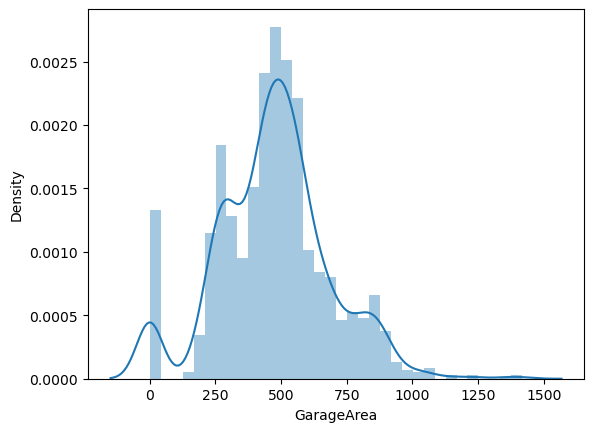

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


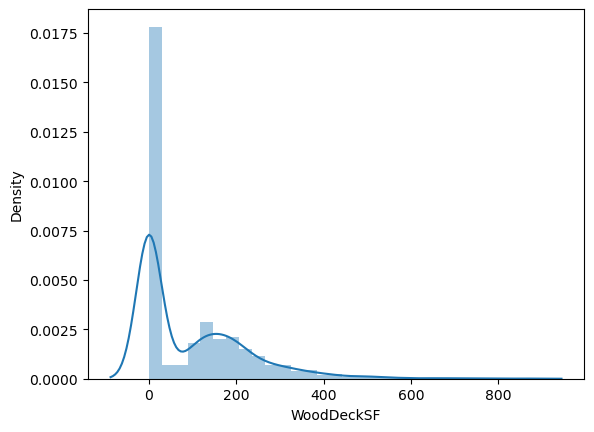

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


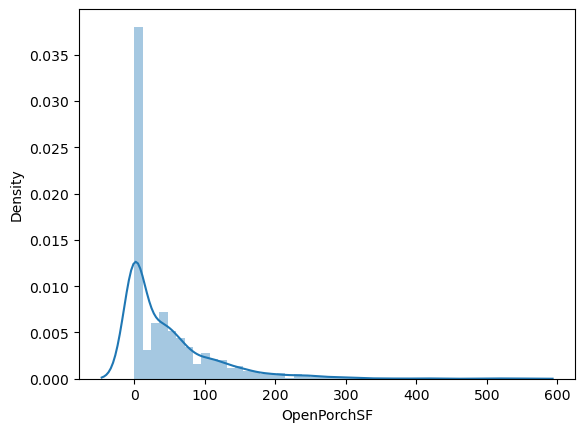

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


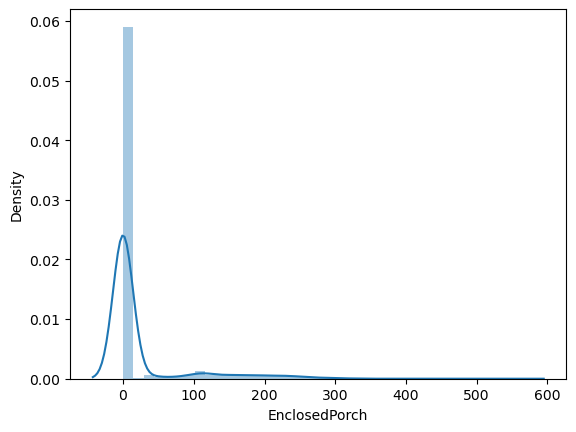

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


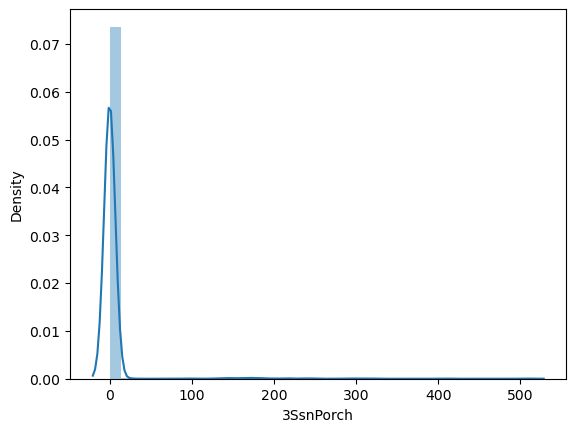

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


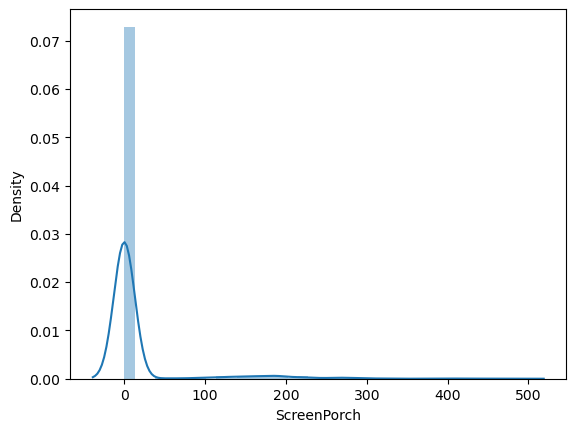

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


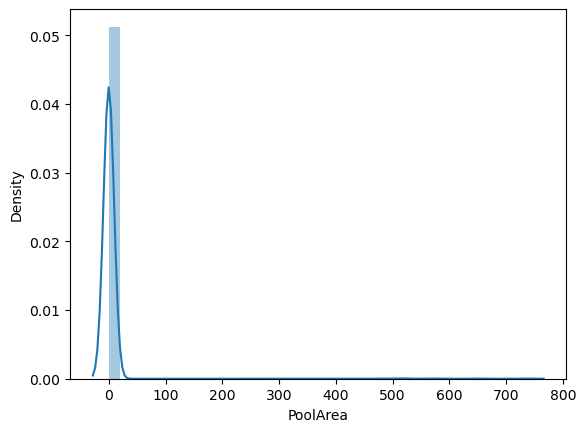

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


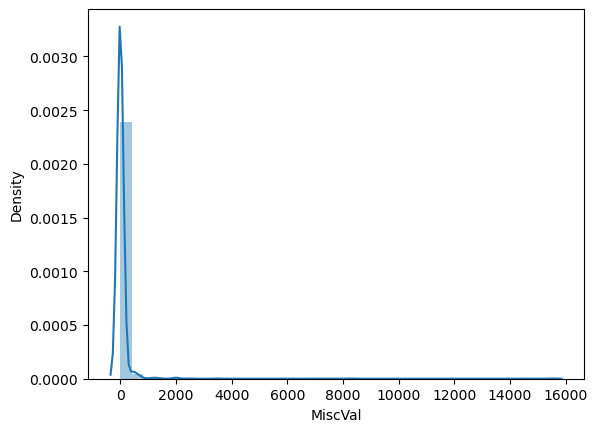

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


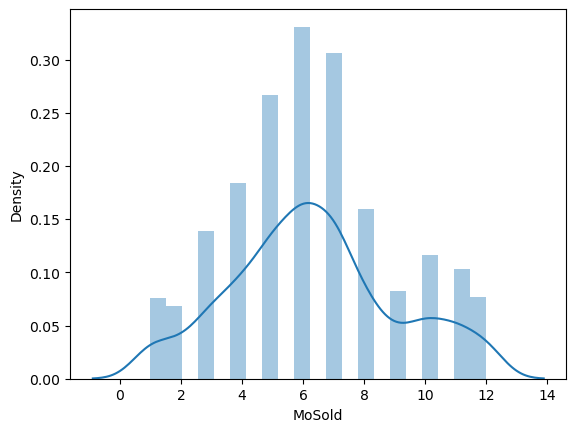

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


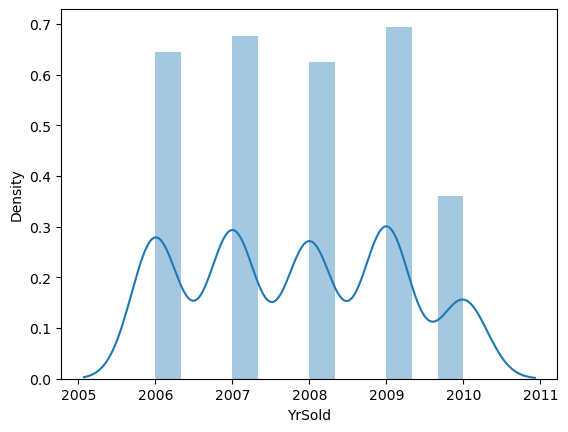

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\3609540409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated


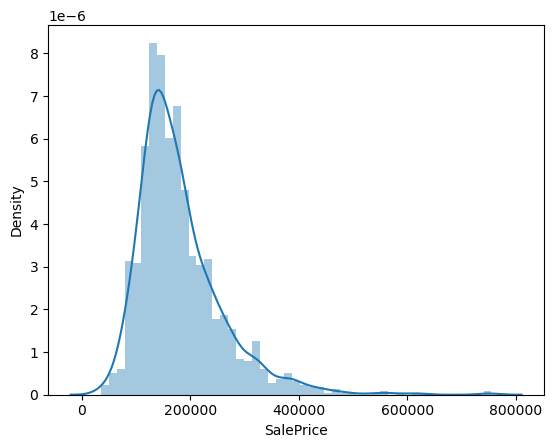

In [29]:
# Distribution chart of continuous columns

for i in con:
    sns.distplot(train_new[i]) # can use 'displot' or 'histplot' in future as 'distplot' will be deprecated
    plt.show()

# Fixing the skewness of the training data

In [30]:
skewed = train_new[con].apply(lambda x: skew(x))
skewed = skewed[skewed > 0.75]
skewed = skewed.index
skewed

# Can also use below one:

# skewed = [i for i in con if np.abs(train[i].skew()) > 0.75]

# skewed

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [31]:
train_new[skewed] = np.log1p(train_new[skewed])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


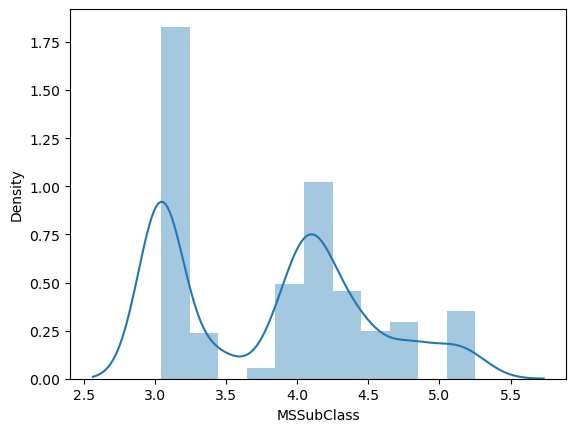

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


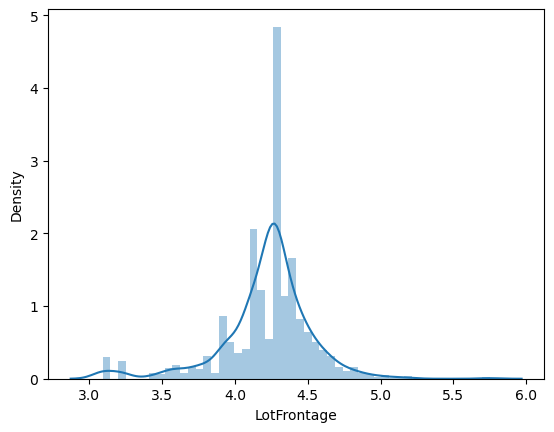

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


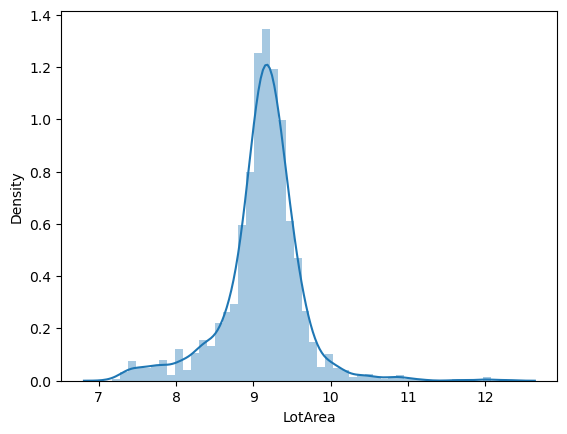

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


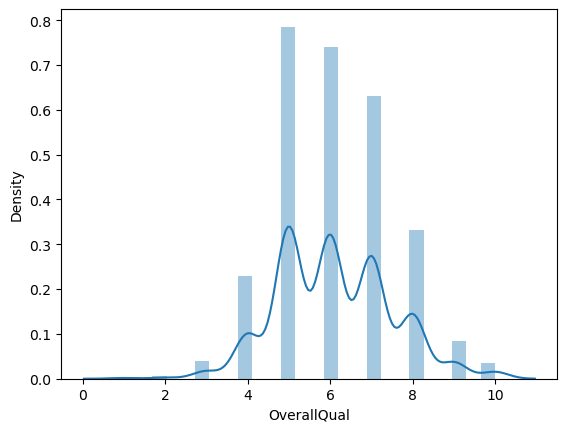

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


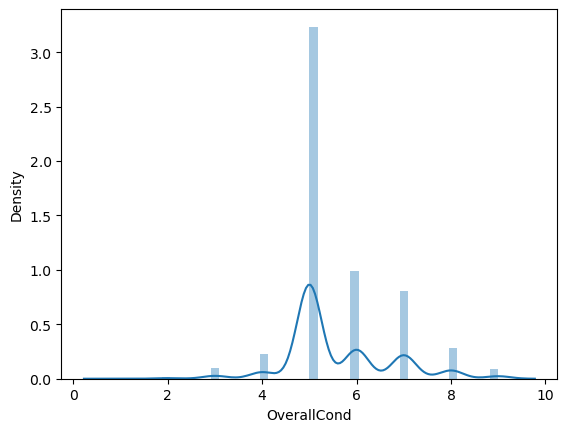

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


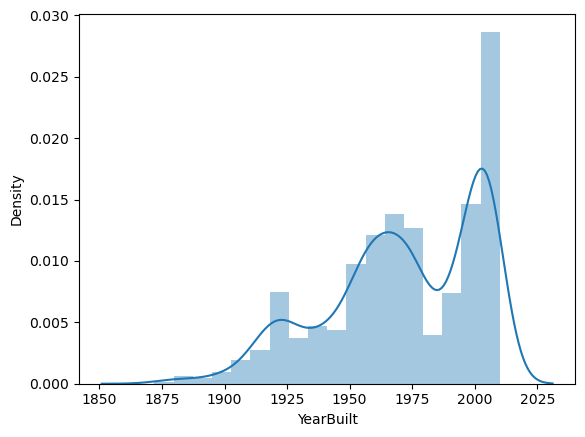

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


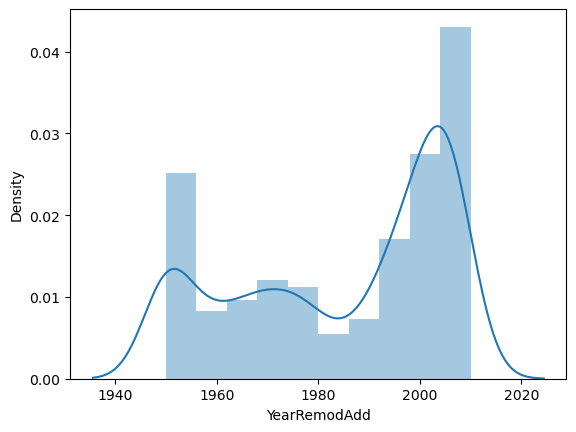

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


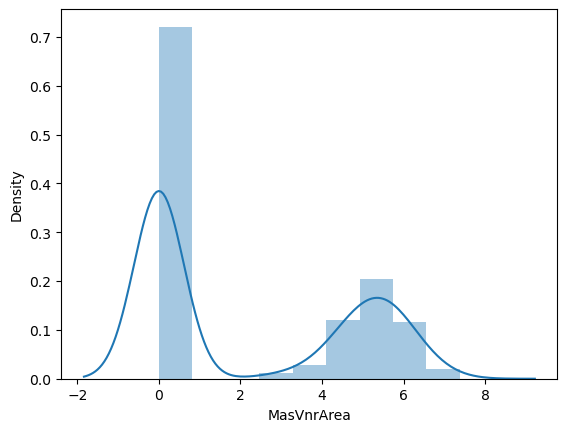

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


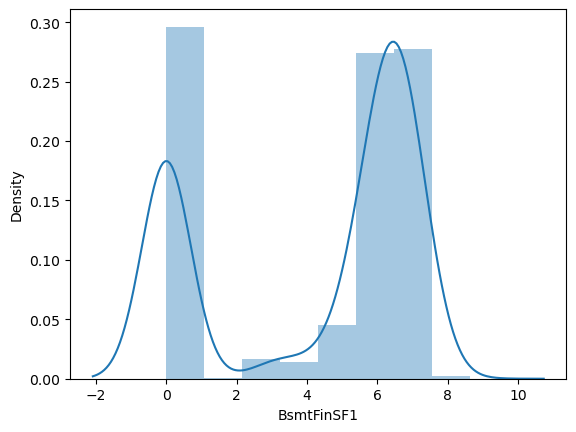

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


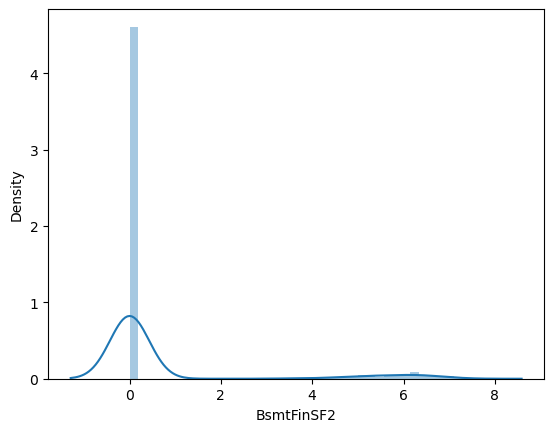

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


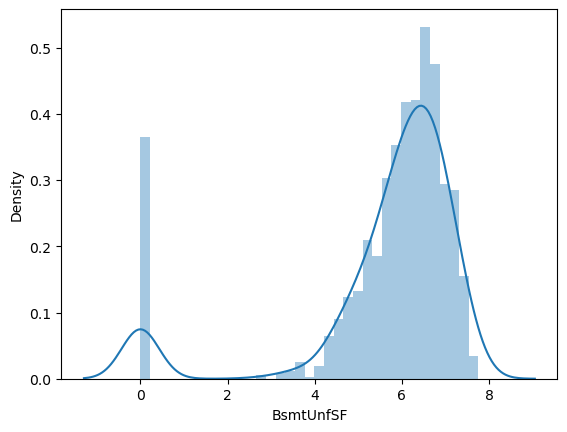

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


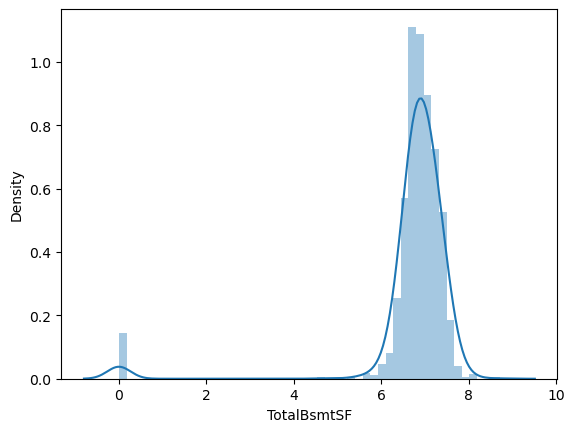

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


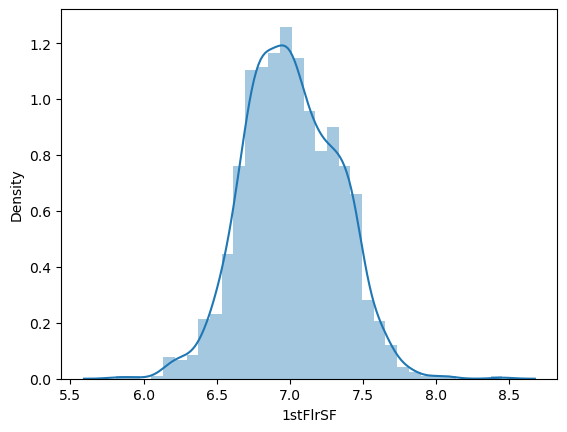

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


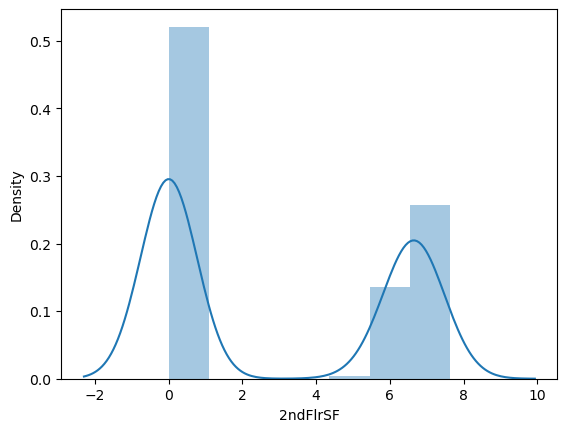

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


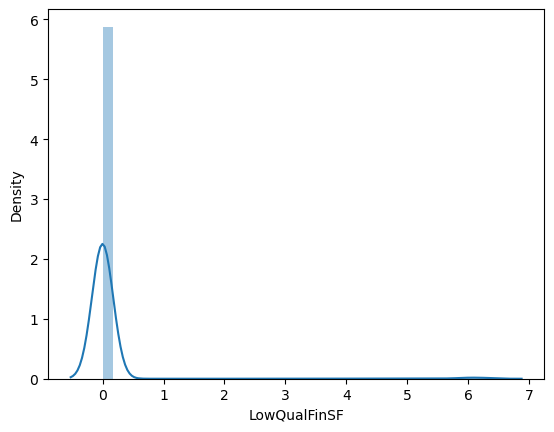

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


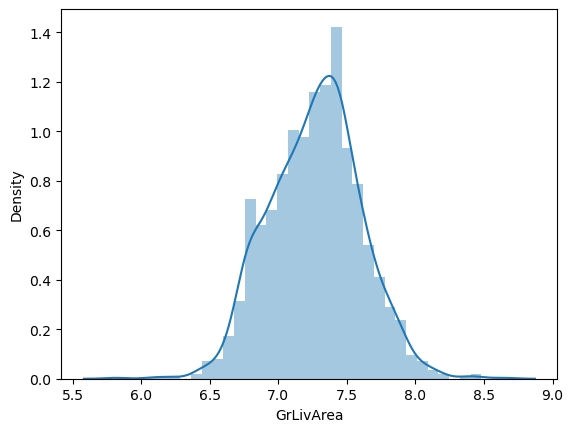

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


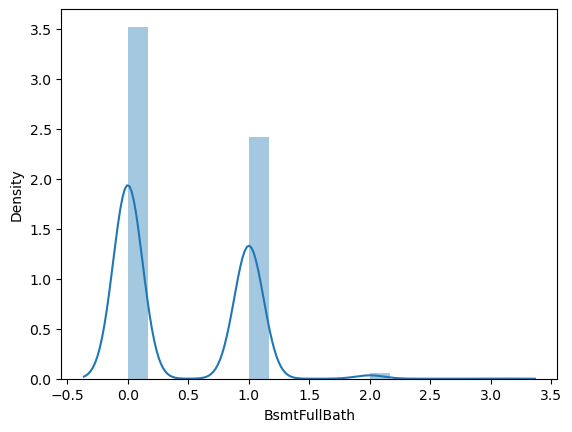

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


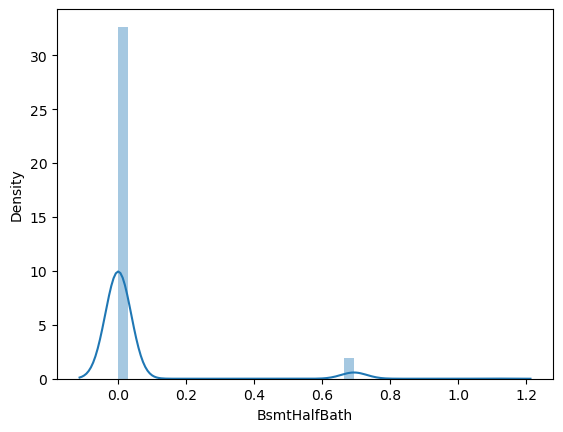

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


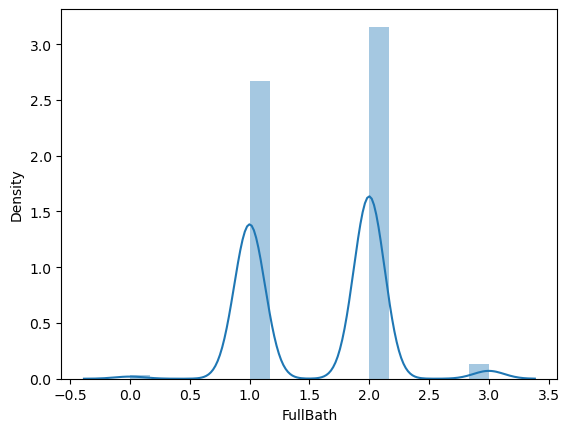

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


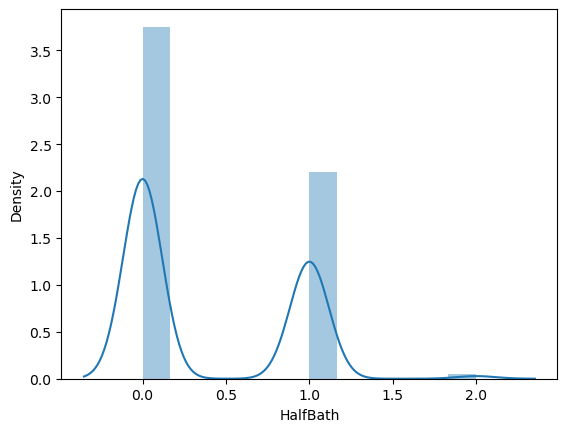

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


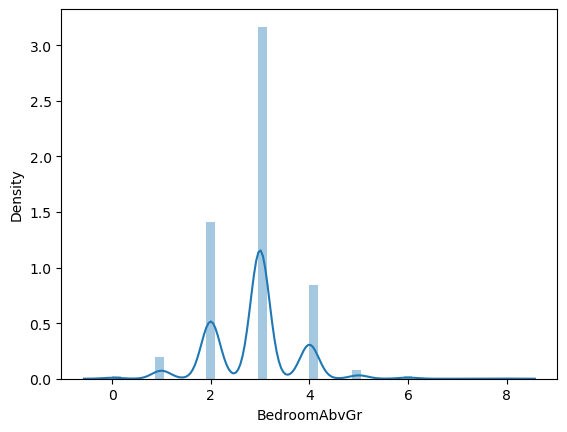

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


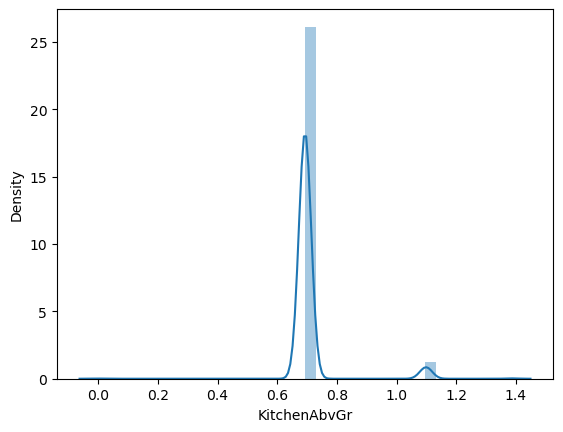

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


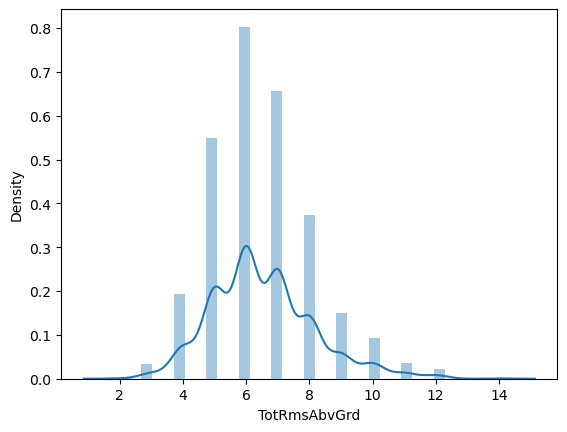

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


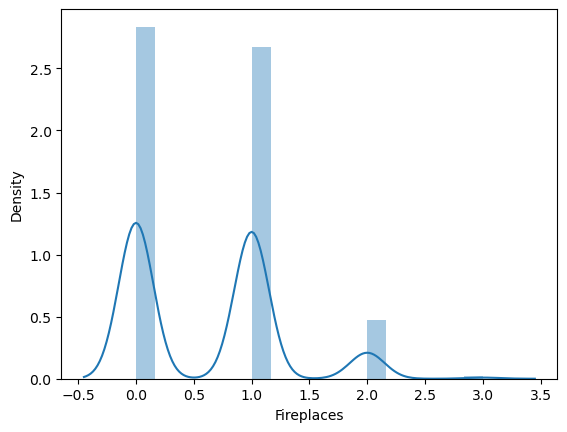

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


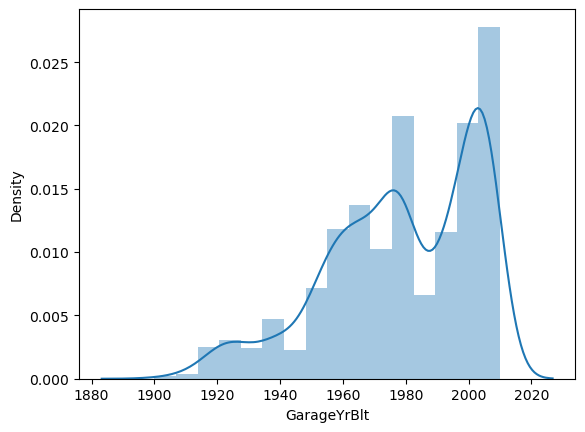

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


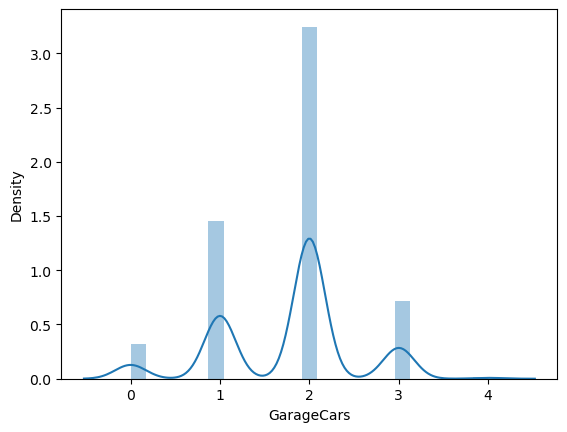

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


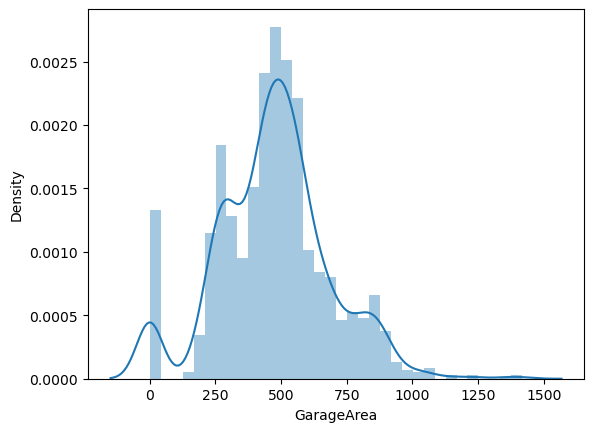

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


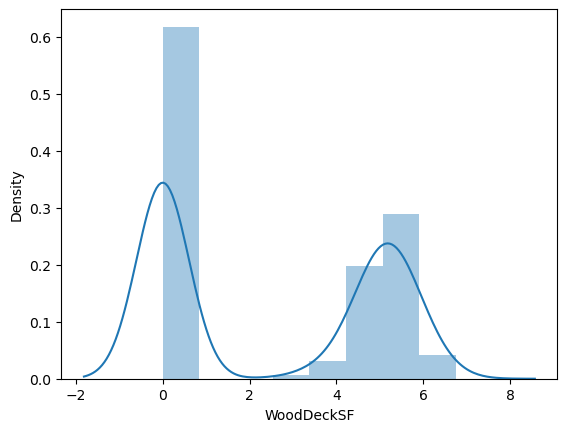

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


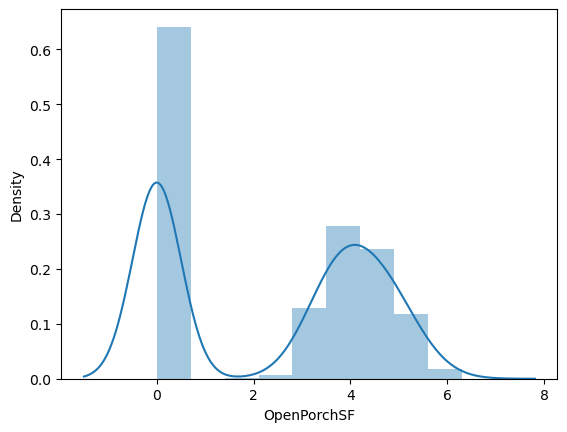

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


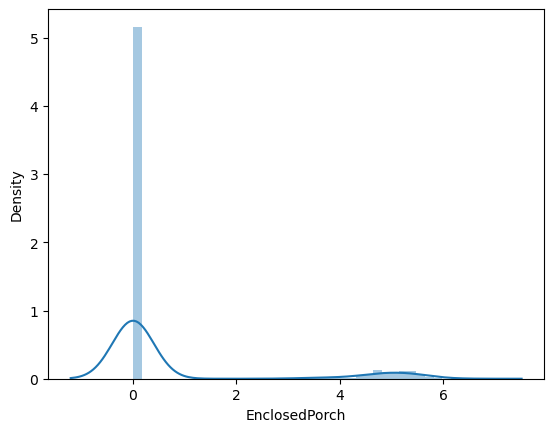

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


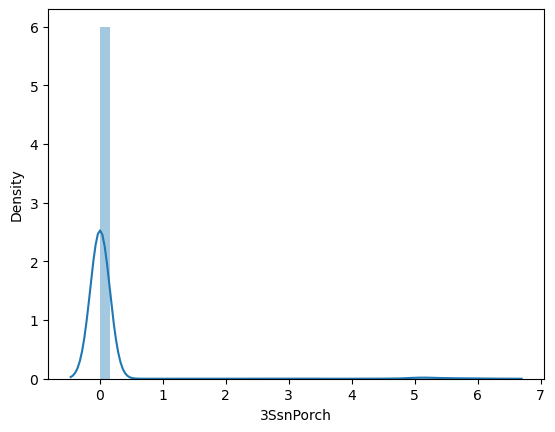

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


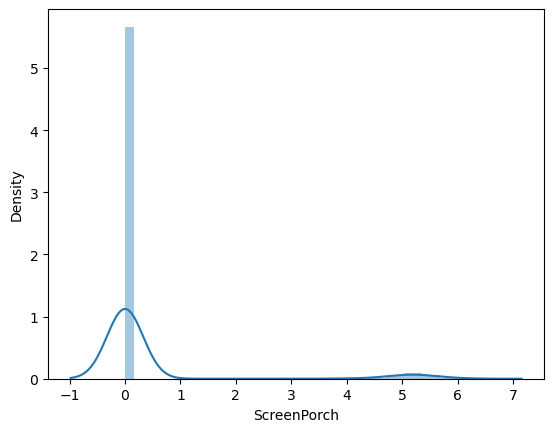

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


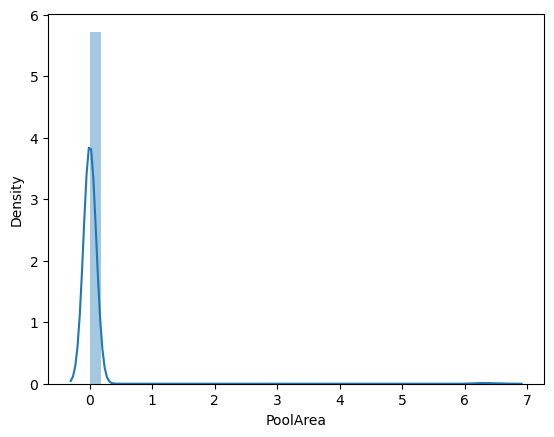

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


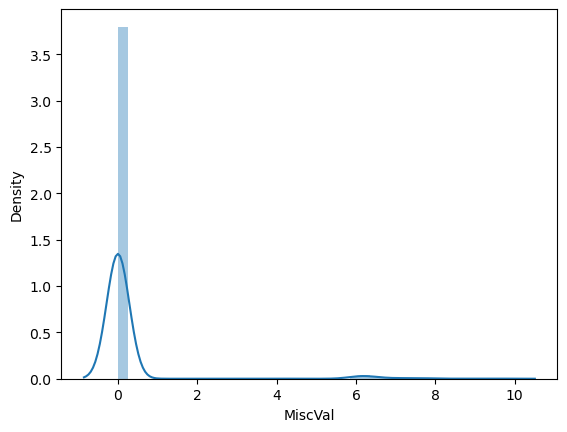

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


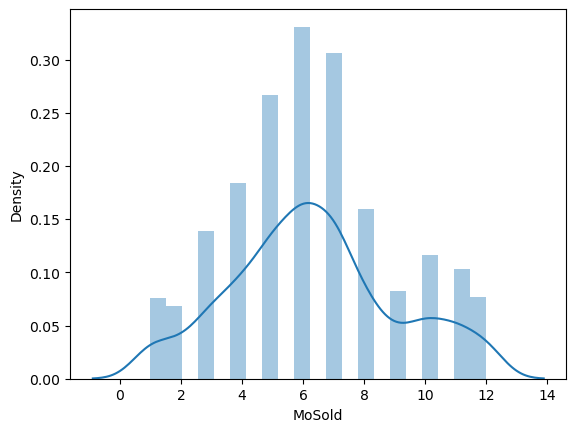

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


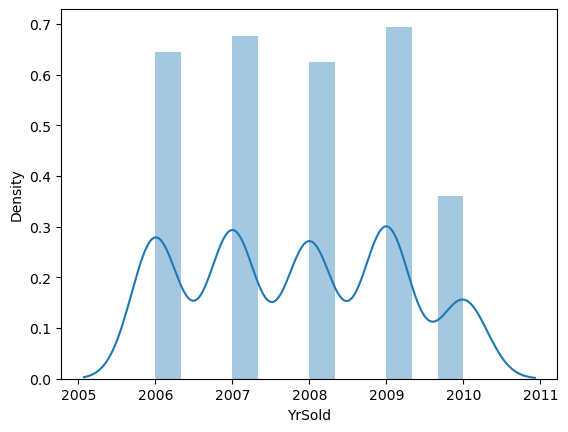

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9712\2429092873.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_new[i])


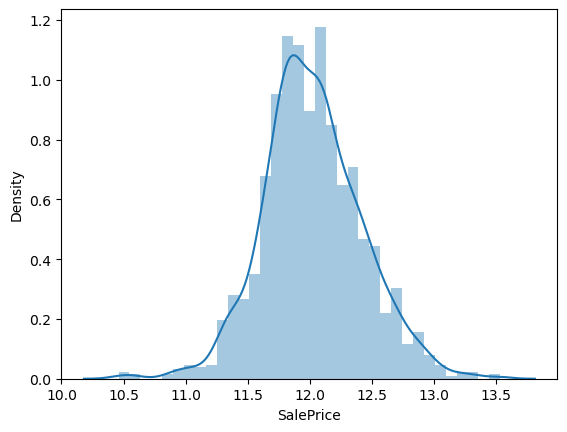

In [32]:
# Distribution chart of continuous columns after the skewness is fixed

for i in con:
    sns.distplot(train_new[i])
    plt.show()

In [33]:
corr = train_new[con].corr()
corr['SalePrice'].sort_values(ascending=False)*100

SalePrice        100.000000
OverallQual       81.718461
GrLivArea         73.025377
GarageCars        68.062487
GarageArea        65.088768
1stFlrSF          60.895504
FullBath          59.477066
YearBuilt         58.657019
YearRemodAdd      56.560778
TotRmsAbvGrd      53.442240
GarageYrBlt       50.044908
Fireplaces        48.944955
OpenPorchSF       45.994791
MasVnrArea        42.032973
LotArea           39.992318
TotalBsmtSF       37.283770
LotFrontage       34.666839
WoodDeckSF        34.303865
HalfBath          31.398222
BsmtFullBath      23.622416
BedroomAbvGr      20.904343
BsmtUnfSF         20.823308
BsmtFinSF1        20.809874
2ndFlrSF          18.077791
ScreenPorch       10.585748
PoolArea           6.994885
3SsnPorch          5.882693
MoSold             5.732950
BsmtHalfBath      -0.488992
MSSubClass        -2.027902
BsmtFinSF2        -3.036069
OverallCond       -3.686845
YrSold            -3.726291
LowQualFinSF      -5.451333
MiscVal           -6.705358
KitchenAbvGr     -14

## So we can see that after the skewness is fixed, the plots are not skewed to that extent and also the co-relation is not changed with the target variable

# Standardization of the continuous columns - for both training and testing dataset

In [34]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

con.remove('SalePrice')
train_new[con] = ss.fit_transform(train_new[con])
test_new[con] = ss.transform(test_new[con])

con.append('SalePrice')

# Outlier Treatment

In [35]:
# Fetching the outliers along with the count for each column

out = []

for i in con:
    out.append(i)
    count = 0
    for j in train_new[i]:
        if (np.abs(j) > 3):
            count += 1
    out.append(count)

In [36]:
out

['MSSubClass',
 0,
 'LotFrontage',
 47,
 'LotArea',
 33,
 'OverallQual',
 2,
 'OverallCond',
 28,
 'YearBuilt',
 6,
 'YearRemodAdd',
 0,
 'MasVnrArea',
 0,
 'BsmtFinSF1',
 0,
 'BsmtFinSF2',
 56,
 'BsmtUnfSF',
 118,
 'TotalBsmtSF',
 37,
 '1stFlrSF',
 6,
 '2ndFlrSF',
 0,
 'LowQualFinSF',
 26,
 'GrLivArea',
 8,
 'BsmtFullBath',
 16,
 'BsmtHalfBath',
 82,
 'FullBath',
 0,
 'HalfBath',
 12,
 'BedroomAbvGr',
 14,
 'KitchenAbvGr',
 68,
 'TotRmsAbvGrd',
 12,
 'Fireplaces',
 5,
 'GarageYrBlt',
 2,
 'GarageCars',
 0,
 'GarageArea',
 7,
 'WoodDeckSF',
 0,
 'OpenPorchSF',
 0,
 'EnclosedPorch',
 2,
 '3SsnPorch',
 24,
 'ScreenPorch',
 104,
 'PoolArea',
 7,
 'MiscVal',
 52,
 'MoSold',
 0,
 'YrSold',
 0,
 'SalePrice',
 1460]

In [37]:
# Removing the outliers from the below columns as they have more number of outliers

val1 = ['BsmtUnfSF', 'TotalBsmtSF', 'KitchenAbvGr', 'ScreenPorch']

for i in val1:
    Q1 = train_new[i].quantile(0.05)
    Q3 = train_new[i].quantile(0.95)
    IQR = Q3 - Q1
    train_new = train_new[(train_new[i] >= Q1 - 1.5*IQR) & (train_new[i] <= Q3 + 1.5*IQR)]

In [38]:
train_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.424462,-0.087206,-0.133270,0.651479,-0.517200,1.050994,0.878668,1.193074,0.779431,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,-1.125202,0.563711,0.113413,-0.071836,2.179628,0.156734,-0.429577,-0.815959,0.888257,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,0.424462,0.054079,0.420049,0.651479,-0.517200,0.984752,0.830215,1.121030,0.654803,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,0.645073,-0.337602,0.103317,0.651479,-0.517200,-1.863632,-0.720298,-0.815959,0.384539,-0.355342,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
4,0.424462,0.716916,0.878431,1.374795,-0.517200,0.951632,0.733308,1.412710,0.754400,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.424462,-0.235065,-0.259231,-0.071836,-0.517200,0.918511,0.733308,-0.815959,-1.414140,-0.355342,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1456,-1.125202,0.754090,0.725429,-0.071836,0.381743,0.222975,0.151865,1.004570,0.816966,2.409693,...,Attchd,Unf,TA,TA,Y,0,MnPrv,0,WD,Normal
1457,0.645073,-0.039410,-0.002359,0.651479,3.078570,-1.002492,1.024029,-0.815959,0.464947,-0.355342,...,Attchd,RFn,TA,TA,Y,0,GdPrv,Shed,WD,Normal
1458,-1.125202,0.054079,0.136833,-0.795151,0.381743,-0.704406,0.539493,-0.815959,-0.106220,3.405917,...,Attchd,Unf,TA,TA,Y,0,0,0,WD,Normal


# ANOVA test for checking significance of categorical variables with respect to target variable

### ANOVA assumes that the data is normally distributed.

In [39]:
pvals = []
for col in cat:
    sample = []
    for i in train_new[col].unique():
        s = train_new[train_new[col]==i]['SalePrice'].values
        sample.append(s)
    pval = stats.f_oneway(*sample)[1]
    pvals.append(pval)

In [40]:
# p-value for each of the categorical column 

anv = pd.DataFrame(pvals, columns=['count'])
anv = anv.sort_values(by='count', ascending=False)
anv

,count
5,5.901962e-01
7,2.959754e-01
25,6.119843e-02
40,5.598760e-02
1,1.942847e-02
38,1.009814e-02
10,4.045169e-03
14,2.539681e-04
31,5.437334e-05
11,1.961674e-06


In [41]:
# Checking the disparity score for each of the categorical column using p-value and log

anv['score'] = np.log(1/anv['count'].values)
anv

,count,score
5,5.901962e-01,0.527300
7,2.959754e-01,1.217479
25,6.119843e-02,2.793634
40,5.598760e-02,2.882625
1,1.942847e-02,3.941016
38,1.009814e-02,4.595404
10,4.045169e-03,5.510232
14,2.539681e-04,8.278302
31,5.437334e-05,9.819637
11,1.961674e-06,13.141712


In [42]:
anv = anv.sort_values(by='score', ascending=False)
anv

,count,score
8,2.100169e-227,521.944798
18,2.884097e-180,413.406105
30,8.567612e-174,398.501817
21,2.549204e-169,388.201100
34,1.747637e-123,282.659702
32,1.946741e-105,241.105278
20,1.870364e-99,227.329791
27,6.690241e-72,163.885477
24,4.202092e-65,148.232449
0,1.039305e-61,140.419138


In [43]:
anv['col'] = cat
anv

,count,score,col
8,2.100169e-227,521.944798,MSZoning
18,2.884097e-180,413.406105,Street
30,8.567612e-174,398.501817,Alley
21,2.549204e-169,388.201100,LotShape
34,1.747637e-123,282.659702,LandContour
32,1.946741e-105,241.105278,Utilities
20,1.870364e-99,227.329791,LotConfig
27,6.690241e-72,163.885477,LandSlope
24,4.202092e-65,148.232449,Neighborhood
0,1.039305e-61,140.419138,Condition1


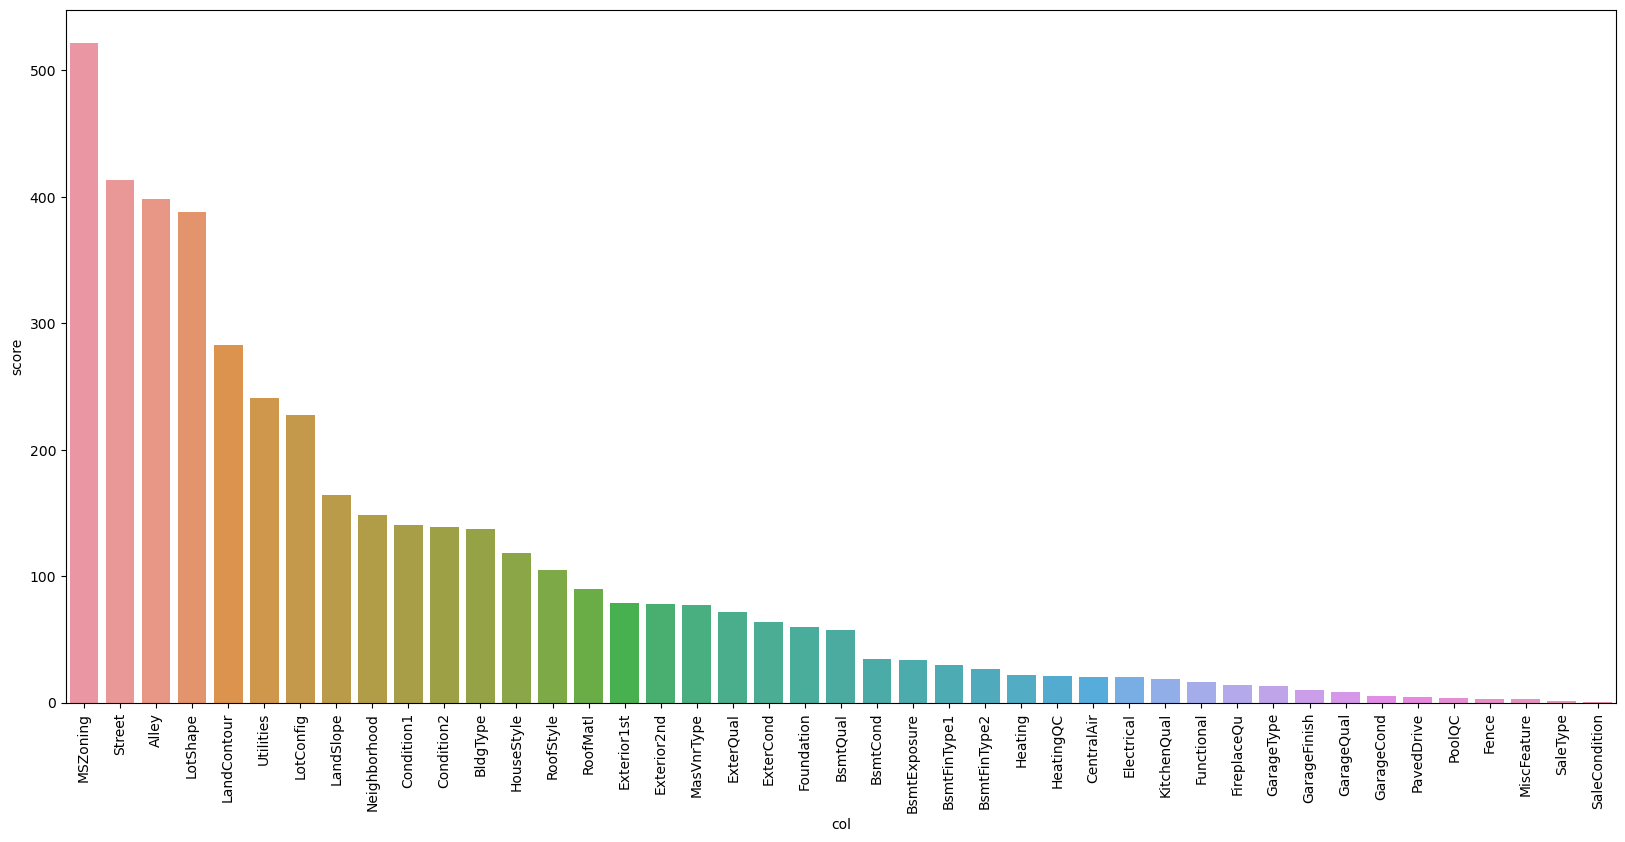

In [44]:
# Plotting the significance in descending order for categorical columns

plt.figure(figsize=(20, 9))
sns.barplot(data=anv, x='col', y='score')
plt.xticks(rotation=90)
plt.show()

### So above are the features which are highly impacting the target variables

# Label Encoding for categorical columns

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cat:
    train_new[i] = le.fit_transform(train_new[i])
    test_new[i] = le.fit_transform(test_new[i])
    
# We can remove le.fit_transform() and can just use le.transform()

# Splitting up training dataset for training and testing

In [46]:
X = train_new.drop(labels='SalePrice', axis=1)
Y = train_new['SalePrice']

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=40)

# DecisionTree

In [48]:
print(xtrain.shape)
print(xtest.shape)

(1096, 79)
(275, 79)


In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_absolute_error

dtr = DecisionTreeRegressor(random_state=30, criterion='absolute_error', max_depth=10)
model = dtr.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(np.abs(np.mean(cross_val_score(dtr, X, Y, scoring='neg_mean_absolute_error', cv=5))))
print(mean_absolute_error(ypred, ytest))
print(r2_score(ypred, ytest))
r = r2_score(ypred, ytest)
n = xtest.shape[0]
p = xtest.shape[1]
adjr = 1-(1-r)*(n-1)/(n-p-1)
print(adjr)

0.14577843597322576
0.1456184943201113
0.6973791633562416
0.57477892697236


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=30, criterion='absolute_error', max_depth=10, n_estimators=20)
model = rfr.fit(xtrain, ytrain)
ypred = model.predict(xtest)

print(np.abs(np.mean(cross_val_score(rfr, X, Y, scoring='neg_mean_absolute_error', cv=5))))
print(mean_absolute_error(ypred, ytest))
print(r2_score(ypred, ytest))
r = r2_score(ypred, ytest)
n = xtest.shape[0]
p = xtest.shape[1]
adjr = 1-(1-r)*(n-1)/(n-p-1)
print(adjr)

0.10034963134305644
0.0971853430843696
0.8426026570496465
0.7788365540082213


In [51]:
imp = pd.DataFrame()
imp['col'] = X.columns
imp['importance'] = model.feature_importances_

In [52]:
imp = imp.sort_values(by='importance', ascending=False)
imp

,col,importance
3,OverallQual,0.340020
15,GrLivArea,0.107843
12,1stFlrSF,0.057271
11,TotalBsmtSF,0.056604
26,GarageArea,0.054312
...,...,...
74,PoolQC,0.000169
76,MiscFeature,0.000112
46,Condition2,0.000000
21,KitchenAbvGr,0.000000


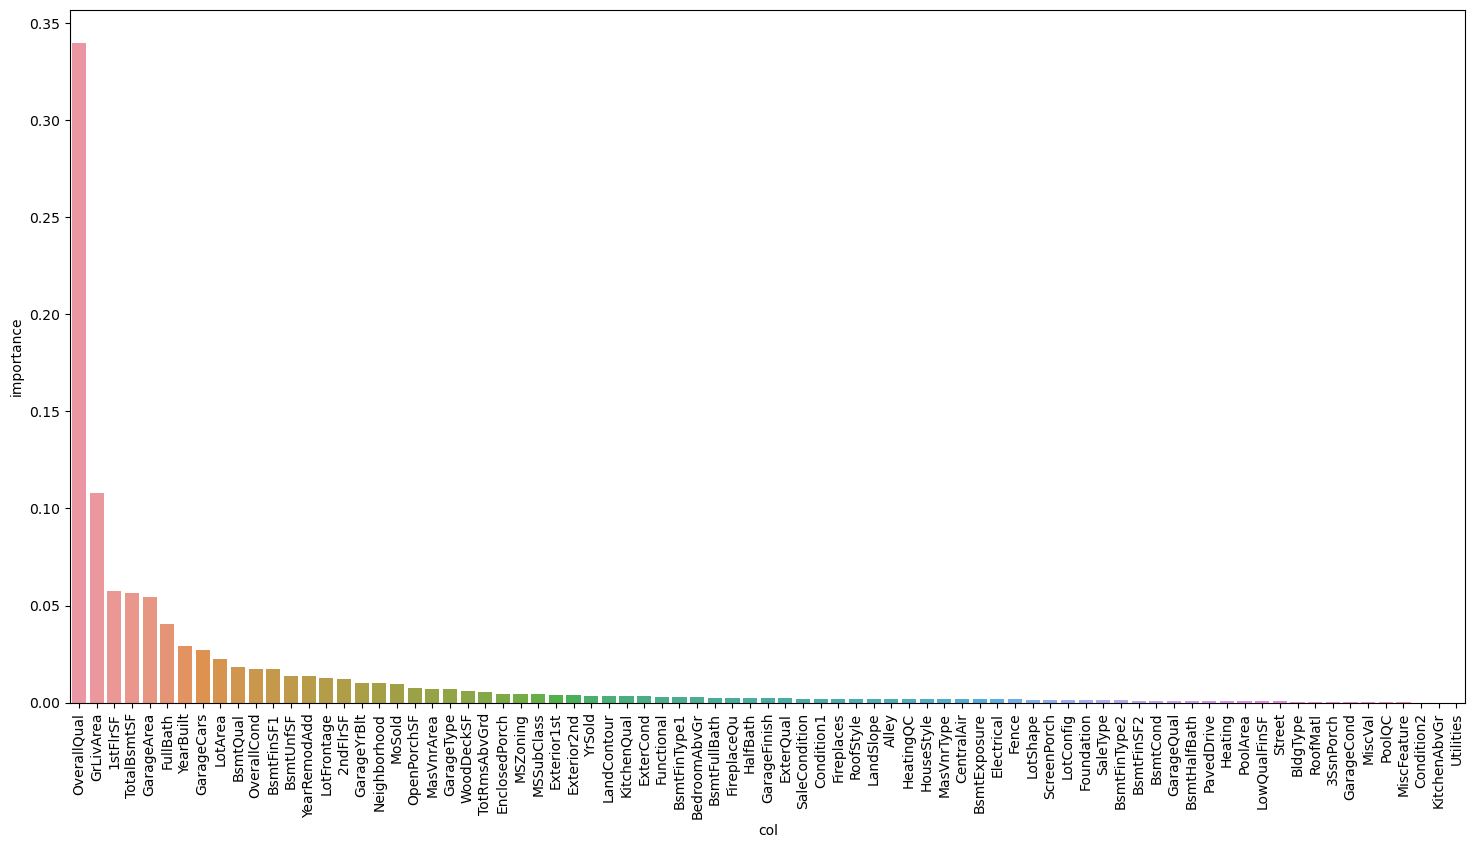

In [53]:
plt.figure(figsize=(18, 9))
sns.barplot(data=imp, x='col', y='importance')
plt.xticks(rotation=90)
plt.show()

In [54]:
ypred_main = model.predict(test_new)

In [55]:
ypred_main.shape

(1459,)

In [56]:
ypred_main

array([12.0880218 , 12.06187484, 12.22090644, ..., 12.19770921,
       11.99372996, 12.7490082 ])

In [57]:
test_new['SalePrice'] = ypred_main

In [58]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [59]:
# Inverse transforming

# test_new[con] = ss.inverse_transform(test_new[con])

In [60]:
test_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,23.515170,240.867584,22453.737667,-0.795151,0.381743,-0.340077,-1.156380,-0.815959,155.053831,77.718291,...,2,3,4,2,0,3,0,8,4,12.088022
1,23.515170,244.045974,27567.894528,-0.071836,0.381743,-0.439440,-1.301740,40.252976,307.175470,-0.355342,...,2,3,4,2,0,0,1,8,4,12.061875
2,81.644757,221.797249,26722.946873,-0.795151,-0.517200,0.852269,0.636400,-0.815959,263.043478,-0.355342,...,0,3,4,2,0,3,0,8,4,12.220906
3,81.644757,234.510806,19275.032987,-0.071836,0.381743,0.885390,0.636400,6.789399,199.854490,-0.355342,...,0,3,4,2,0,0,0,8,4,12.293786
4,168.839136,123.267180,9659.644680,1.374795,-0.517200,0.686666,0.345679,-0.815959,86.515511,-0.355342,...,1,3,4,2,0,0,0,8,4,12.756482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,226.968722,53.342616,3725.675906,-1.518467,1.280685,-0.041991,-0.720298,-0.815959,-1.414140,-0.355342,...,2,3,4,2,0,0,0,8,4,11.920949
1455,226.968722,53.342616,3644.468123,-1.518467,-0.517200,-0.041991,-0.720298,-0.815959,82.837845,-0.355342,...,2,3,4,2,0,0,0,8,0,11.977050
1456,23.515170,495.138728,38652.757018,-0.795151,1.280685,-0.373198,0.539493,-0.815959,407.809784,-0.355342,...,2,3,4,2,0,0,0,8,0,12.197709
1457,117.975748,183.656577,20170.252127,-0.795151,-0.517200,0.686666,0.345679,-0.815959,111.256173,-0.355342,...,2,3,4,2,0,3,3,8,4,11.993730


In [61]:
test_new['SalePrice'] = np.expm1(test_new['SalePrice'])
test_new

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,23.515170,240.867584,22453.737667,-0.795151,0.381743,-0.340077,-1.156380,-0.815959,155.053831,77.718291,...,2,3,4,2,0,3,0,8,4,177729.174273
1,23.515170,244.045974,27567.894528,-0.071836,0.381743,-0.439440,-1.301740,40.252976,307.175470,-0.355342,...,2,3,4,2,0,0,1,8,4,173142.298076
2,81.644757,221.797249,26722.946873,-0.795151,-0.517200,0.852269,0.636400,-0.815959,263.043478,-0.355342,...,0,3,4,2,0,3,0,8,4,202987.872565
3,81.644757,234.510806,19275.032987,-0.071836,0.381743,0.885390,0.636400,6.789399,199.854490,-0.355342,...,0,3,4,2,0,0,0,8,4,218333.924159
4,168.839136,123.267180,9659.644680,1.374795,-0.517200,0.686666,0.345679,-0.815959,86.515511,-0.355342,...,1,3,4,2,0,0,0,8,4,346791.587046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,226.968722,53.342616,3725.675906,-1.518467,1.280685,-0.041991,-0.720298,-0.815959,-1.414140,-0.355342,...,2,3,4,2,0,0,0,8,4,150383.238833
1455,226.968722,53.342616,3644.468123,-1.518467,-0.517200,-0.041991,-0.720298,-0.815959,82.837845,-0.355342,...,2,3,4,2,0,0,0,8,0,159061.180312
1456,23.515170,495.138728,38652.757018,-0.795151,1.280685,-0.373198,0.539493,-0.815959,407.809784,-0.355342,...,2,3,4,2,0,0,0,8,0,198333.288500
1457,117.975748,183.656577,20170.252127,-0.795151,-0.517200,0.686666,0.345679,-0.815959,111.256173,-0.355342,...,2,3,4,2,0,3,3,8,4,161736.504272


In [63]:
test_new['SalePrice']

0       177729.174273
1       173142.298076
2       202987.872565
3       218333.924159
4       346791.587046
            ...      
1454    150383.238833
1455    159061.180312
1456    198333.288500
1457    161736.504272
1458    344209.340463
Name: SalePrice, Length: 1459, dtype: float64